In [1]:
#libraries
import numpy as np
import cv2 as cv
import random
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Set the directory and labels
train_dir = r'/kaggle/input/asl-dataset/asl_dataset/asl_dataset/'
labels = os.listdir(train_dir)

In [3]:
# Set the training and validation data
X_train, y_train, X_valid, y_valid = [], [], [], []

# Load the images and labels
for label_idx, label in enumerate(labels):
    folderpath = os.path.join(train_dir, label)
    images = []
    for file in os.listdir(folderpath):
        img_path = os.path.join(folderpath, file)
        img = cv.imread(img_path)
        img = cv.resize(img, (224, 224))
        images.append(np.array(img))
    X, y = np.array(images), np.full(len(images), label_idx)
    X_train_label, X_valid_label, y_train_label, y_valid_label = train_test_split(X, y, test_size=0.1, random_state=42)
    X_train.append(X_train_label)
    y_train.append(y_train_label)
    X_valid.append(X_valid_label)
    y_valid.append(y_valid_label)

X_train = np.concatenate(X_train, axis=0)
y_train = np.concatenate(y_train, axis=0)
X_valid = np.concatenate(X_valid, axis=0)
y_valid = np.concatenate(y_valid, axis=0)

# Normalize the data
X_train = X_train / 255.
X_valid = X_valid / 255.

In [4]:
# Set the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(labels), activation='softmax'))

In [5]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_valid, y_valid))

Epoch 1/20
71/71 [==============================] - 17s 77ms/step - loss: 1.3754 - accuracy: 0.6138 - val_loss: 0.3737 - val_accuracy: 0.8770
Epoch 2/20
71/71 [==============================] - 4s 54ms/step - loss: 0.3618 - accuracy: 0.8842 - val_loss: 0.2861 - val_accuracy: 0.9206
Epoch 3/20
71/71 [==============================] - 4s 57ms/step - loss: 0.1703 - accuracy: 0.9359 - val_loss: 0.2350 - val_accuracy: 0.9325
Epoch 4/20
71/71 [==============================] - 4s 54ms/step - loss: 0.1410 - accuracy: 0.9536 - val_loss: 0.1846 - val_accuracy: 0.9444
Epoch 5/20
71/71 [==============================] - 4s 54ms/step - loss: 0.0859 - accuracy: 0.9713 - val_loss: 0.0815 - val_accuracy: 0.9722
Epoch 6/20
71/71 [==============================] - 4s 57ms/step - loss: 0.0863 - accuracy: 0.9700 - val_loss: 0.1704 - val_accuracy: 0.9563
Epoch 7/20
71/71 [==============================] - 4s 55ms/step - loss: 0.0759 - accuracy: 0.9761 - val_loss: 0.1438 - val_accuracy: 0.9603
Epoch 8/20
7

In [7]:
# Evaluate the model
loss, accuracy = model.evaluate(X_valid, y_valid)
print('Validation loss:', loss)
print('Validation accuracy:', accuracy)

8/8 [==============================] - 0s 23ms/step - loss: 0.1425 - accuracy: 0.9603
Validation loss: 0.1424809992313385
Validation accuracy: 0.9603174328804016


8/8 [==============================] - 0s 22ms/step


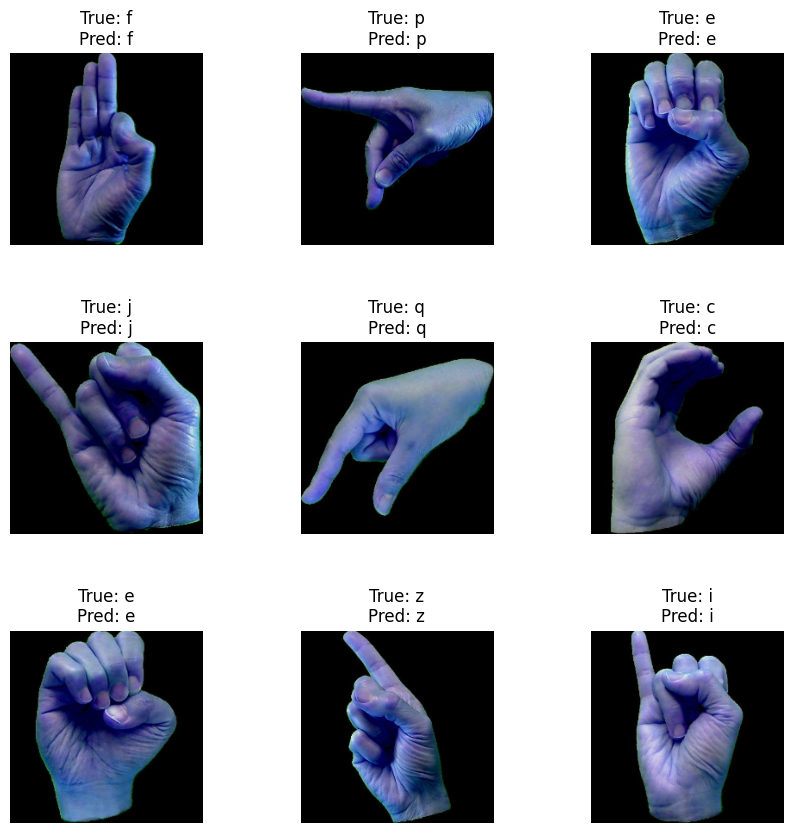

In [8]:
# get the predicted labels for the validation set
y_pred = model.predict(X_valid)
y_pred_labels = np.argmax(y_pred, axis=1)

# display random predictions
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i, ax in enumerate(axs.flat):
    idx = np.random.randint(0, len(X_valid)) # generate a random index
    ax.imshow(X_valid[idx])
    ax.set_title(f"True: {labels[y_valid[idx]]}\nPred: {labels[y_pred_labels[idx]]}")
    ax.axis('off')
plt.show()

8/8 [==============================] - 0s 22ms/step


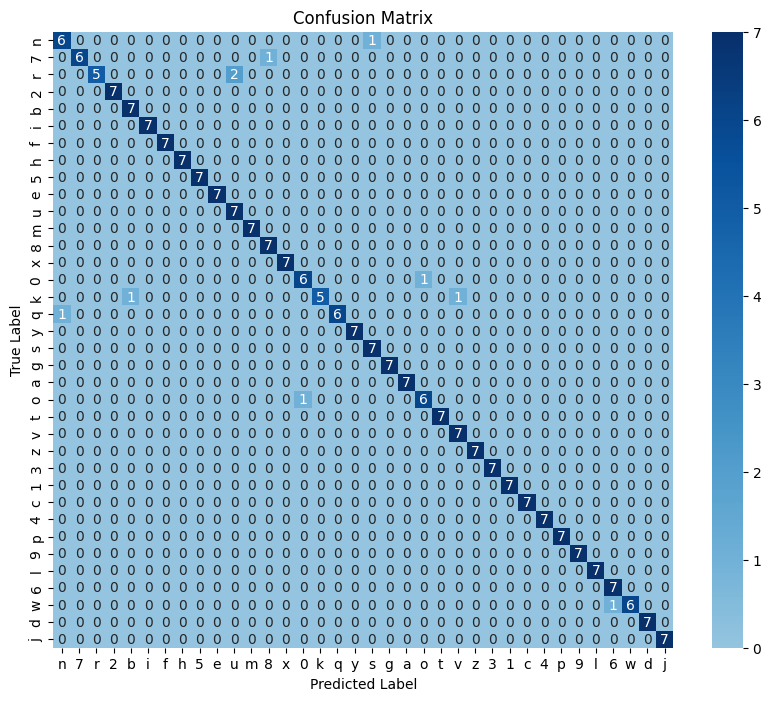

In [9]:
# Define a custom colormap
cmap = plt.cm.get_cmap('Blues', 256)
new_cmap = ListedColormap(cmap(np.linspace(0.4, 1, 256)))

def conf_matrix(model, X_valid, y_valid, labels):
    y_pred = np.argmax(model.predict(X_valid), axis=-1)
    cm = confusion_matrix(y_valid, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, cmap=new_cmap, fmt=".0f", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.savefig("ConfMat.png")
    plt.show()
    
conf_matrix(model, X_valid, y_valid, labels)